# Desafío 3

## Modelado Star Wars para clasificación de Especies

---
<b><a id='section_1_1'>1.1. Descripción del dataset Characters</a></b>

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [57]:
data_location = "../Data/StarWars_Species/characters.csv"
data = pd.read_csv(data_location, sep=",")
print(data.shape)


(87, 10)


Remoción de espacios

In [58]:
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

data = trim_all_columns(data)
data.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77,blond,fair,blue,19BBY,male,Tatooine,Human
1,C-3PO,167.0,75,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
2,R2-D2,96.0,32,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid
3,Darth Vader,202.0,136,none,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49,brown,light,brown,19BBY,female,Alderaan,Human


In [59]:
data_describe = pd.DataFrame(round(data.isnull().sum() /data.shape[0],2), columns= ['Porcentaje de nulos'])
data_describe['type'] = data.dtypes
data_describe = data_describe[['type','Porcentaje de nulos']]
data_describe['Nulos'] = data.isnull().sum()
values= []
example=[]
for x in data:
    values.append(len(data[x].unique()))
    example.append(data[x].unique())
data_describe['Valores distintos'] = values
data_describe['Ejemplos'] = example


data_describe

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
name,object,0.00,0,87,"[Luke Skywalker, C-3PO, R2-D2, Darth Vader, Le..."
height,float64,0.07,6,46,"[172.0, 167.0, 96.0, 202.0, 150.0, 178.0, 165...."
mass,object,0.32,28,39,"[77, 75, 32, 136, 49, 120, 84, nan, 112, 80, 7..."
hair_color,object,0.07,6,12,"[blond, nan, none, brown, brown, grey, black, ..."
skin_color,object,0.02,2,31,"[fair, gold, white, blue, white, light, white,..."
eye_color,object,0.03,3,15,"[blue, yellow, red, brown, blue-gray, black, o..."
birth_year,object,0.51,44,37,"[19BBY, 112BBY, 33BBY, 41.9BBY, 52BBY, 47BBY, ..."
gender,object,0.03,3,5,"[male, nan, female, hermaphrodite, none]"
homeworld,object,0.11,10,49,"[Tatooine, Naboo, Alderaan, Stewjon, Eriadu, K..."
species,object,0.06,5,38,"[Human, Droid, Wookiee, Rodian, Hutt, Yoda's s..."


In [60]:
# Analizamos la proporción entre clases Target
data['species'].value_counts(normalize=True).round(2)

Human             0.43
Droid             0.06
Gungan            0.04
Kaminoan          0.02
Mirialan          0.02
Twi'lek           0.02
Wookiee           0.02
Zabrak            0.02
Skakoan           0.01
Pau'an            0.01
Kaleesh           0.01
Neimodian         0.01
Iktotchi          0.01
Muun              0.01
Vulptereen        0.01
Clawdite          0.01
Quermian          0.01
Rodian            0.01
Geonosian         0.01
Toydarian         0.01
Tholothian        0.01
Dug               0.01
Nautolan          0.01
Besalisk          0.01
Xexto             0.01
Mon Calamari      0.01
Aleena            0.01
Togruta           0.01
Ewok              0.01
Yoda's species    0.01
Toong             0.01
Chagrian          0.01
Cerean            0.01
Hutt              0.01
Trandoshan        0.01
Kel Dor           0.01
Sullustan         0.01
Name: species, dtype: float64

---
<b><a id='section_1_2'>1.2. Preparación y manejo de nulos</a></b>

Basado en la investigacion del mundo Star Wars, y teniendo como consulta una tabla especifica de datos de cada especie, decidimos eliminar algunas columnas que no son relevantes para el analisis.

Imputacion de Especie por investigacion en Internet

In [61]:
sp_mask = data['species'].isnull()
sp_nulls = data.loc[sp_mask, :]
sp_nulls

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
36,Ric Olié,183.0,NaN,brown,fair,blue,NaN,male,Naboo,NaN
39,Quarsh Panaka,183.0,NaN,black,dark,brown,62BBY,male,Naboo,NaN
72,R4-P17,96.0,NaN,none,"silver, red","red, blue",NaN,female,NaN,NaN
79,Sly Moore,178.0,48,none,pale,white,NaN,female,Umbara,NaN
85,Captain Phasma,NaN,NaN,NaN,NaN,NaN,NaN,female,NaN,NaN


Analisis de la tabla de Especies

In [62]:
data_sp_location = "../Data/StarWars_Species/species.csv"
data_sp = pd.read_csv(data_sp_location, sep=",")
data_sp['name'].unique()


array(['Hutt', "Yoda's species", 'Trandoshan', 'Mon Calamari', 'Ewok',
       'Sullustan', 'Neimodian', 'Gungan', 'Toydarian', 'Dug', "Twi'lek",
       'Aleena', 'Vulptereen', 'Xexto', 'Toong', 'Cerean', 'Nautolan',
       'Zabrak', 'Tholothian', 'Iktotchi', 'Quermian', 'Kel Dor',
       'Chagrian', 'Geonosian', 'Mirialan', 'Clawdite', 'Besalisk',
       'Kaminoan', 'Skakoan', 'Muun', 'Togruta', 'Kaleesh', "Pau'an",
       'Wookiee', 'Droid', 'Human', 'Rodian'], dtype=object)

Ric Olié es 'Human' - Quarsh Panaka es 'Human' - R4 es 'Droid' - Sly Moore es 'Umbaran' - Phasma es 'Human'

Imputación de especie en Nulos

In [63]:
data.loc[36, ['species']] = 'Human'
data.loc[39, ['species']] = 'Human'
data.loc[85, ['species']] = 'Human'
data.loc[72, ['species']] = 'Droid'
data.loc[79, ['species']] = 'Umbaran'
data['species'].isnull().sum()

0

Eliminacion de filas con valores nulos en 'height', 'mass', 'hair_color', 'skin_color', 'eye_color', 'gender', 'homeworld'

In [64]:
data.shape

(87, 10)

In [65]:
data.dropna(how='all', subset=['height', 'mass', 'hair_color', 'skin_color', 'eye_color'], inplace=True)
data.shape

(86, 10)

Trabajo sobre 'gender'

In [66]:
gr_mask = data['gender'].isnull()
gr_nulls = data.loc[gr_mask, :]
gr_nulls

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
1,C-3PO,167.0,75,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
2,R2-D2,96.0,32,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid
7,R5-D4,97.0,32,NaN,"white, red",red,NaN,NaN,Tatooine,Droid


In [67]:
data['gender'].unique()

array(['male', nan, 'female', 'hermaphrodite', 'none'], dtype=object)

Al ser todos Droid, imputamos genero 'none'

In [68]:
data.loc[gr_mask, ['gender']] = 'none'
data['gender'].isnull().sum()

0

En el caso de 'homeworld' muchas especies comparten el planeta natal, por lo tanto esta columna y la fecha de nacimiento no se utilizaran para el analisis.

In [69]:
data.drop(['homeworld', 'birth_year'], axis=1, inplace=True)
data.shape

(86, 8)

Columna 'eye_color'

In [70]:
ey_mask = data['eye_color'].isnull()
ey_nulls = data.loc[ey_mask, :]
ey_nulls

,name,height,mass,hair_color,skin_color,eye_color,gender,species
71,Ratts Tyerell,79.0,15,none,"grey, blue",NaN,male,Aleena
73,Wat Tambor,193.0,48,none,"green, grey",NaN,male,Skakoan


In [71]:
data['eye_color'].unique()

array(['blue', 'yellow', 'red', 'brown', 'blue-gray', 'black', 'orange',
       'hazel', 'pink', nan, 'red, blue', 'gold', 'green, yellow',
       'white', 'dark'], dtype=object)

Al ser personajes con cascos o gafas, decidimos agregar 'unknown' como categoria

In [72]:
data.loc[ey_mask, ['eye_color']] = 'unknown'
data['eye_color'].isnull().sum()

0

Columna 'skin_color'

In [73]:
sk_mask = data['skin_color'].isnull()
sk_nulls = data.loc[sk_mask, :]
sk_nulls

,name,height,mass,hair_color,skin_color,eye_color,gender,species
12,Chewbacca,228.0,112,brown,NaN,blue,male,Wookiee


In [74]:
data['skin_color'].unique()

array(['fair', 'gold', 'white, blue', 'white', 'light', 'white, red', nan,
       'green', 'green-tan, brown', 'pale', 'metal', 'dark',
       'brown mottle', 'brown', 'grey', 'mottled green', 'orange',
       'blue, grey', 'grey, red', 'red', 'blue', 'grey, green, yellow',
       'yellow', 'tan', 'fair, green, yellow', 'grey, blue',
       'silver, red', 'green, grey', 'red, blue, white', 'brown, white',
       'none'], dtype=object)

In [75]:
data.loc[12, ['skin_color']] = 'dark'

Columna 'hair_color'

In [76]:
hr_mask = data['hair_color'].isnull()
hr_nulls = data.loc[hr_mask, :]
hr_nulls

,name,height,mass,hair_color,skin_color,eye_color,gender,species
1,C-3PO,167.0,75,NaN,gold,yellow,none,Droid
2,R2-D2,96.0,32,NaN,"white, blue",red,none,Droid
7,R5-D4,97.0,32,NaN,"white, red",red,none,Droid
14,Greedo,173.0,74,NaN,green,black,male,Rodian
15,Jabba Desilijic Tiure,175.0,"1,358",NaN,"green-tan, brown",orange,hermaphrodite,Hutt


In [78]:
data['hair_color'].value_counts()

none             37
brown            18
black            13
white             4
blond             3
auburn, grey      1
grey              1
blonde            1
brown, grey       1
auburn, white     1
auburn            1
Name: hair_color, dtype: int64

In [79]:
data.loc[hr_mask, ['hair_color']] = 'none'
data['hair_color'].isnull().sum()

0

In [81]:
data.loc[data['hair_color']=='blonde', ['hair_color']] = 'blond'

Convertir a numerica la columna de 'mass'

In [88]:
data['mass'].isnull().sum()

27

In [90]:

data['mass'] = pd.to_numeric(data['mass'], errors='coerce')
data['mass'].dtype

dtype('float64')

Tanto para 'mass' y 'height' por su relevancia, completaremos con el SimpleImputer

In [93]:
data['mass'].describe()

count     58.000000
mean      75.575862
std       29.252514
min       15.000000
25%       55.300000
50%       79.000000
75%       84.000000
max      159.000000
Name: mass, dtype: float64

In [94]:
data['height'].describe()

count     81.000000
mean     174.358025
std       34.770429
min       66.000000
25%      167.000000
50%      180.000000
75%      191.000000
max      264.000000
Name: height, dtype: float64

Text(0, 0.5, 'Masa')

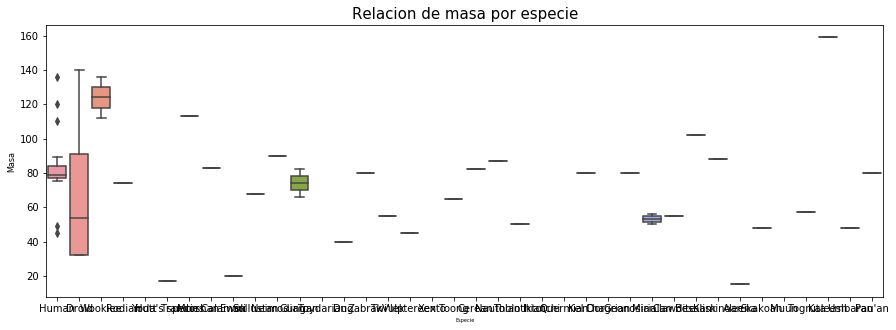

In [96]:
f, ax = plt.subplots()
f.set_figwidth(15)
f.set_figheight(5)
sns.boxplot(x=data['species'],y=data['mass'])
plt.title("Relacion de masa por especie",fontsize=15)
plt.xlabel("Especie",fontsize=5)
plt.ylabel("Masa",fontsize=8)

Text(0, 0.5, 'Altura')

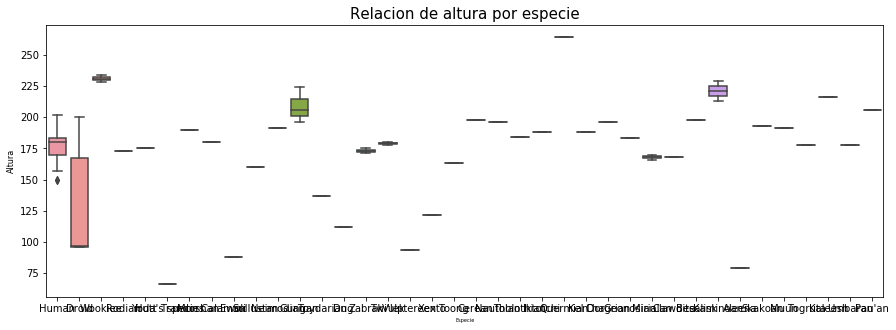

In [97]:
f, ax = plt.subplots()
f.set_figwidth(15)
f.set_figheight(5)
sns.boxplot(x=data['species'],y=data['height'])
plt.title("Relacion de altura por especie",fontsize=15)
plt.xlabel("Especie",fontsize=5)
plt.ylabel("Altura",fontsize=8)

#### Se aplica SimpleImputer, se pueden variar las estrategias de imputacion sobre los valores de masa y altura

In [107]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean')
height_mass = data[['height','mass']]
data[['height', 'mass']] = imp_mean.fit_transform(height_mass)

data[['height', 'mass']].isnull().sum()

height    0
mass      0
dtype: int64

In [108]:
data.sample(5)

,name,height,mass,hair_color,skin_color,eye_color,gender,species
82,Rey,174.358025,75.575862,brown,light,hazel,female,Human
81,Finn,174.358025,75.575862,black,dark,dark,male,Human
1,C-3PO,167.000000,75.000000,none,gold,yellow,none,Droid
26,Mon Mothma,150.000000,75.575862,auburn,fair,blue,female,Human
44,Dud Bolt,94.000000,45.000000,none,"blue, grey",yellow,male,Vulptereen


---
<b><a id='section_1_3'>1.3. Preparación de sets de datos, conversion de variables categoricas</a></b>

Conversion con LabelEncoder

In [111]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [113]:
le = LabelEncoder()

In [120]:
data[['hair_color', 'skin_color', 'eye_color',
       'gender', 'species']] = data[['hair_color', 'skin_color', 'eye_color',
       'gender', 'species']].apply(le.fit_transform)
data.head(3)

,name,height,mass,hair_color,skin_color,eye_color,gender,species
0,Luke Skywalker,172.0,77.0,4,6,1,2,10
1,C-3PO,167.0,75.0,8,8,14,3,5
2,R2-D2,96.0,32.0,8,27,10,3,5


In [125]:
X = data.drop(['name', 'species'], axis=1)
y = data['species']
print(X.info())
print(y)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 86
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   height      86 non-null     float64
 1   mass        86 non-null     float64
 2   hair_color  86 non-null     int64  
 3   skin_color  86 non-null     int64  
 4   eye_color   86 non-null     int64  
 5   gender      86 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 7.2 KB
None
0     10
1      5
2      5
3     10
4     10
      ..
81    10
82    10
83    10
84     5
86    10
Name: species, Length: 86, dtype: int64


In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

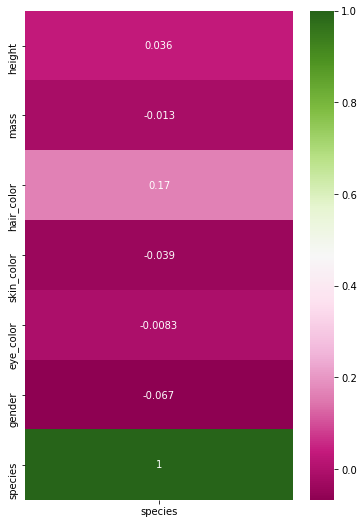

In [134]:
data_corr = data.drop(['name'], axis=1)
plt.figure(figsize=(6,9))
sns.heatmap(data_corr.corr()[['species']], cmap="PiYG", annot=True)

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=12)

In [129]:
display(y_train.value_counts(normalize=True).round(2))
display(y_test.value_counts(normalize=True).round(2))

10    0.45
5     0.06
9     0.05
37    0.03
31    0.03
17    0.02
2     0.02
4     0.02
6     0.02
7     0.02
11    0.02
12    0.02
13    0.02
14    0.02
16    0.02
19    0.02
36    0.02
21    0.02
22    0.02
24    0.02
26    0.02
27    0.02
28    0.02
29    0.02
30    0.02
32    0.02
34    0.02
35    0.02
1     0.02
Name: species, dtype: float64

10    0.36
5     0.09
25    0.05
23    0.05
20    0.05
18    0.05
16    0.05
15    0.05
14    0.05
8     0.05
3     0.05
34    0.05
33    0.05
0     0.05
Name: species, dtype: float64